In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
import sys

# Increase recursion limit (not the best solution, but an option)
sys.setrecursionlimit(30000)

# ... (rest of your code)

In [3]:
df=pd.read_csv('/content/data_peserta_fix (1).csv')

In [4]:
def calculate_ideal_weight(height):
    return (height - 100) * 0.9

def filter_ideal_candidates(data):
    data['Berat Ideal'] = data['Tinggi Badan (cm)'].apply(calculate_ideal_weight)
    data['Berat Ideal Min'] = data['Berat Ideal'] - 5
    data['Berat Ideal Max'] = data['Berat Ideal'] + 5
    return data[(data['Tinggi Badan (cm)'] >= 160) &
                (data['Tinggi Badan (cm)'] <= 190) &
                (data['Berat Badan (kg)'] >= data['Berat Ideal Min']) &
                (data['Berat Badan (kg)'] <= data['Berat Ideal Max']) & (data['Raport SMA'] >= 75)]

In [5]:
def recursive_insertion_sort(arr,n=None):
    if n is None:
        n = len(arr)
    if n <= 1:
        return

    # Sort the first n-1 elements
    recursive_insertion_sort(arr, n - 1)


    key = arr[n - 1]
    j = n - 2


    while j >= 0 and arr[j] > key:
        arr[j + 1] = arr[j]
        j -= 1

    # Place the key after the last element that is smaller than it
    arr[j + 1] = key

In [6]:
def iterative_insertion_sort(arr):
    # Loop through each element in the array starting from index 1
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        # Move elements of arr[0..i-1], that are greater than key, one position ahead
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1

        # Insert the key after the last element that is smaller than it
        arr[j + 1] = key

In [7]:
def measure_time(sort_function, data):
    start_time = time.time()
    sort_function(data.copy())
    return time.time() - start_time

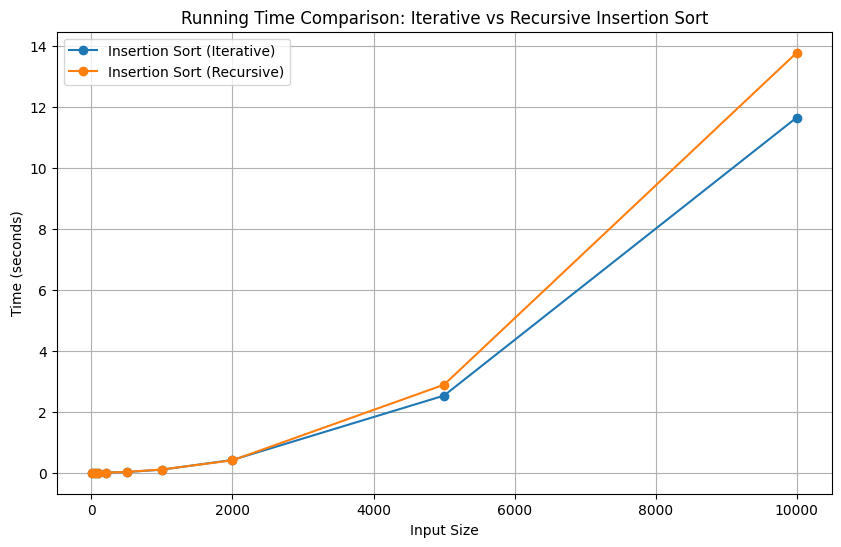

In [9]:
sizes = [10, 50, 100, 200, 500, 1000,2000,5000,10000]
iterative_times = []
recursive_times = []

for size in sizes:
    subset = df['Nilai Tes Fisik'].sample(n=min(size, len(df['Nilai Tes Fisik']))).to_numpy()
    iterative_times.append(measure_time(iterative_insertion_sort, subset))
    recursive_times.append(measure_time(recursive_insertion_sort, subset))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, iterative_times, label='Insertion Sort (Iterative)', marker='o')
plt.plot(sizes, recursive_times, label='Insertion Sort (Recursive)', marker='o')
plt.title('Running Time Comparison: Iterative vs Recursive Insertion Sort')
plt.xlabel('Input Size')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid()
plt.show()

In [12]:
print("Iterative Insertion Sort Times:")
print(iterative_times)
print("Recursive Insertion Sort Times:")
print(recursive_times)

Iterative Insertion Sort Times:
[4.6253204345703125e-05, 0.000209808349609375, 0.0008838176727294922, 0.004134178161621094, 0.023903608322143555, 0.10023307800292969, 0.4191274642944336, 2.531500816345215, 11.65766716003418]
Recursive Insertion Sort Times:
[2.8848648071289062e-05, 0.00023937225341796875, 0.0008976459503173828, 0.0041046142578125, 0.025174617767333984, 0.1054689884185791, 0.40834856033325195, 2.888193368911743, 13.78509259223938]
